In [1]:
import numpy as np
import pandas as pd

#visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for model building
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.
/Users/rabiyanoori/miniconda3/envs/macro-eyes/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/rabiyanoori/miniconda3/envs/macro-eyes/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/rabiyanoori/miniconda3/envs/macro-eyes/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [2]:
#import the data
patients_df = pd.read_csv("raw_data/patients_db_v2.csv")
immun_df = pd.read_csv("raw_data/immunization_db_v2.csv")

In [3]:
patients_df.head()

,Unnamed: 0,pat_id,fac_id,dob,gender,long,lat,region,district
0,0,1,51.0,2019-01-22,f,NaN,NaN,Ghanzi,Ghanzi
1,1,2,89.0,2019-11-12,f,24.877556,-18.370709,Chobe,Chobe
2,2,3,161.0,2019-11-03,m,25.249672,-20.490189,Central,Tutume
3,3,4,168.0,2019-04-17,f,25.579269,-21.412151,Central,Lethlakane
4,4,5,183.0,2018-12-08,m,28.487746,-22.571451,Central,Tuli


In [4]:
immun_df.head()

,Unnamed: 0,pat_id,vaccine,im_date,successful,reason_unsuccesful
0,0,1,OPV,2019-01-31,True,NaN
1,1,2,OPV,2019-11-12,True,NaN
2,2,3,OPV,2019-11-03,True,NaN
3,3,4,OPV,2019-06-01,True,NaN
4,4,5,OPV,2018-12-24,True,NaN


In [5]:
# summary of data in table
patients_df.info()

# 50,000 rows, 9 columns
# lot of columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
Unnamed: 0    50000 non-null int64
pat_id        50000 non-null int64
fac_id        47496 non-null float64
dob           50000 non-null object
gender        48998 non-null object
long          47464 non-null float64
lat           47464 non-null float64
region        48366 non-null object
district      48366 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 3.4+ MB


In [6]:
immun_df.info()

#missing data in reason_unsuccesful column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276764 entries, 0 to 276763
Data columns (total 6 columns):
Unnamed: 0            276764 non-null int64
pat_id                276764 non-null int64
vaccine               276764 non-null object
im_date               276764 non-null object
successful            276764 non-null bool
reason_unsuccesful    2899 non-null object
dtypes: bool(1), int64(2), object(3)
memory usage: 10.8+ MB


In [7]:
# number of null values per column
patients_df.isnull().sum()

Unnamed: 0       0
pat_id           0
fac_id        2504
dob              0
gender        1002
long          2536
lat           2536
region        1634
district      1634
dtype: int64

In [8]:
# number of null values per column
immun_df.isnull().sum()

Unnamed: 0                 0
pat_id                     0
vaccine                    0
im_date                    0
successful                 0
reason_unsuccesful    273865
dtype: int64

In [9]:
# summary of statistics of table data
patients_df.describe(include = 'all')

,Unnamed: 0,pat_id,fac_id,dob,gender,long,lat,region,district
count,50000.000000,50000.000000,47496.000000,50000,48998,47464.000000,47464.000000,48366,48366
unique,NaN,NaN,NaN,730,2,NaN,NaN,15,24
top,NaN,NaN,NaN,2019-04-14,m,NaN,NaN,North-West,Ngamiland East
freq,NaN,NaN,NaN,95,24508,NaN,NaN,16597,14888
mean,24999.500000,25000.500000,173.138033,NaN,NaN,24.832407,-21.280005,NaN,NaN
std,14433.901067,14433.901067,99.776462,NaN,NaN,1.976524,2.271760,NaN,NaN
min,0.000000,1.000000,1.000000,NaN,NaN,20.216349,-26.328640,NaN,NaN
25%,12499.750000,12500.750000,87.000000,NaN,NaN,23.356419,-22.575735,NaN,NaN
50%,24999.500000,25000.500000,173.000000,NaN,NaN,24.784149,-20.287375,NaN,NaN
75%,37499.250000,37500.250000,260.000000,NaN,NaN,25.914824,-19.977738,NaN,NaN


In [10]:
immun_df.describe(include = 'all')

,Unnamed: 0,pat_id,vaccine,im_date,successful,reason_unsuccesful
count,276764.000000,276764.000000,276764,276764,276764,2899
unique,NaN,NaN,2,730,2,4
top,NaN,NaN,OPV,2018-12-14,True,StartedLate
freq,NaN,NaN,160792,522,273865,773
mean,152079.690867,25008.937206,NaN,NaN,NaN,NaN
std,88232.458771,14443.508649,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,75363.750000,12492.750000,NaN,NaN,NaN,NaN
50%,151876.500000,25011.000000,NaN,NaN,NaN,NaN
75%,228391.250000,37511.000000,NaN,NaN,NaN,NaN


In [11]:
# how much data do we lose if we drop rows with missing values?

pat_dropna= patients_df.dropna()
pat_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 1 to 49999
Data columns (total 9 columns):
Unnamed: 0    42772 non-null int64
pat_id        42772 non-null int64
fac_id        42772 non-null float64
dob           42772 non-null object
gender        42772 non-null object
long          42772 non-null float64
lat           42772 non-null float64
region        42772 non-null object
district      42772 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [12]:
# we lose 14% of data if we drop rows with na - too much

1 - 42772/50000

0.14456000000000002

#### Closer look at patients table

In [13]:
#check for duplicate entries
patients_df['pat_id'].is_unique

True

In [14]:
#drop first column and set pat_id as index
patients_df = patients_df.drop(columns = ['Unnamed: 0']).set_index('pat_id')
patients_df.head()

,fac_id,dob,gender,long,lat,region,district
pat_id,,,,,,,
1,51.0,2019-01-22,f,NaN,NaN,Ghanzi,Ghanzi
2,89.0,2019-11-12,f,24.877556,-18.370709,Chobe,Chobe
3,161.0,2019-11-03,m,25.249672,-20.490189,Central,Tutume
4,168.0,2019-04-17,f,25.579269,-21.412151,Central,Lethlakane
5,183.0,2018-12-08,m,28.487746,-22.571451,Central,Tuli


In [15]:
# convert string objects to datetime so we can do operations with dates later

patients_df['dob'] = pd.to_datetime(patients_df['dob'], format='%Y-%m-%d')
patients_df['dob'].describe()

count                   50000
unique                    730
top       2019-04-14 00:00:00
freq                       95
first     2018-01-01 00:00:00
last      2019-12-31 00:00:00
Name: dob, dtype: object

In [16]:
patients_df.describe(include = 'all')

,fac_id,dob,gender,long,lat,region,district
count,47496.000000,50000,48998,47464.000000,47464.000000,48366,48366
unique,NaN,730,2,NaN,NaN,15,24
top,NaN,2019-04-14 00:00:00,m,NaN,NaN,North-West,Ngamiland East
freq,NaN,95,24508,NaN,NaN,16597,14888
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,173.138033,NaN,NaN,24.832407,-21.280005,NaN,NaN
std,99.776462,NaN,NaN,1.976524,2.271760,NaN,NaN
min,1.000000,NaN,NaN,20.216349,-26.328640,NaN,NaN
25%,87.000000,NaN,NaN,23.356419,-22.575735,NaN,NaN


In [17]:
# put in placeholders for missing values

patients_df.fillna("NA", inplace = True)
patients_df.describe(include = 'all')
#patients_df.isnull().sum()

,fac_id,dob,gender,long,lat,region,district
count,50000,50000,50000,50000,50000,50000,50000
unique,346,730,3,346,346,16,25
top,NA,2019-04-14 00:00:00,m,NA,NA,North-West,Ngamiland East
freq,2504,95,24508,2536,2536,16597,14888
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN


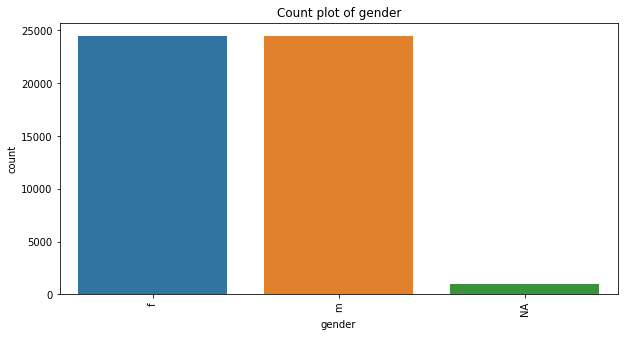

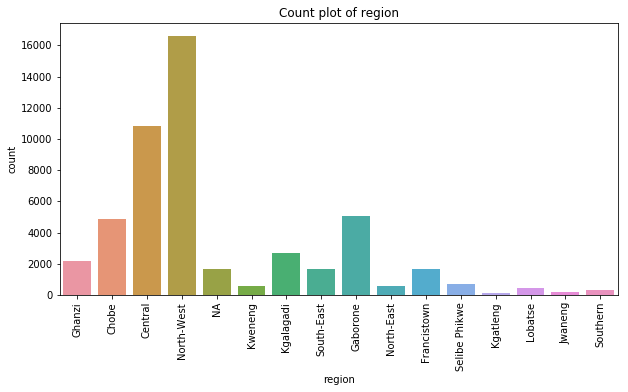

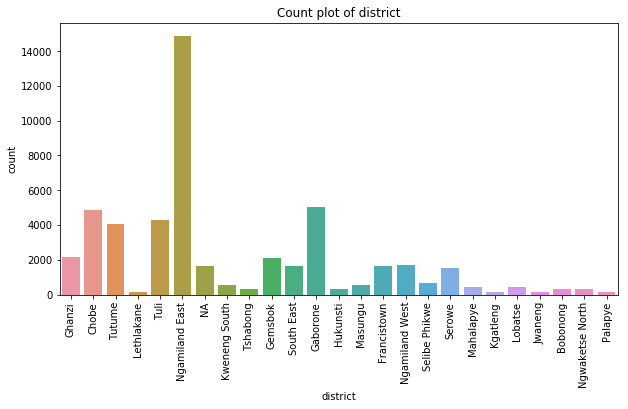

In [18]:
# look at distributions of region, district, gender

vars_to_look = ['gender','region','district']
for i, var in enumerate(vars_to_look):
    plt.figure(figsize=(10,5))
    sns.countplot(patients_df[var])
    plt.xticks(rotation = 90)
    plt.title("Count plot of " + var)    

Notes:

patients
- 9 columns in patients db- lots of missing values
- too many missing values to drop
- no duplicate patients
- roughly equal dist of gender
- 345 unique fac-id, lat, long
- 16 regions
- 25 districts

#### Closer look at immunizations data table

In [19]:
immun_df.head(2)
#immun_df.info() #excludes null values

,Unnamed: 0,pat_id,vaccine,im_date,successful,reason_unsuccesful
0,0,1,OPV,2019-01-31,True,NaN
1,1,2,OPV,2019-11-12,True,NaN


In [20]:
#drop first column
immun_df = immun_df.drop(columns = ['Unnamed: 0'])

In [21]:
# check if duplicate records
immun_df[immun_df.duplicated()]

immun_df = immun_df.drop(index=210740, axis = 0 )
immun_df[immun_df.duplicated()]

,pat_id,vaccine,im_date,successful,reason_unsuccesful


In [22]:
immun_df.loc[immun_df['pat_id']==10683]

,pat_id,vaccine,im_date,successful,reason_unsuccesful
9599,10683,OPV,2018-03-16,True,NaN
54020,10683,OPV,2018-06-05,True,NaN
132973,10683,OPV,2018-08-02,True,NaN
169694,10683,DTP,2018-07-04,True,NaN
248852,10683,DTP,2018-07-23,True,NaN


In [23]:
immun_df['reason_unsuccesful'].value_counts(dropna = False)

NaN                      273864
StartedLate                 773
Expired                     753
OutOfStock                  691
ProfessionalJudgement       682
Name: reason_unsuccesful, dtype: int64

In [24]:
# is 'reason_unsuccesful' NaN for all cases when 'successful' == True?
immun_df[immun_df['successful'] == False].count()

# when 'successful' == False there are 2899 non null values in the 'reason_unsuccesful' column
# there are only exists 2899 non null values in that column
# therefore reason column is only null when succ is True

pat_id                2899
vaccine               2899
im_date               2899
successful            2899
reason_unsuccesful    2899
dtype: int64

In [25]:
# fill missing values for 'reason_unsuccesful'
immun_df['reason_unsuccesful'] = immun_df['reason_unsuccesful'].fillna("Success")
immun_df['reason_unsuccesful'].value_counts()

Success                  273864
StartedLate                 773
Expired                     753
OutOfStock                  691
ProfessionalJudgement       682
Name: reason_unsuccesful, dtype: int64

Text(0.5,1,'Count plot of reason_unsuccesful ')

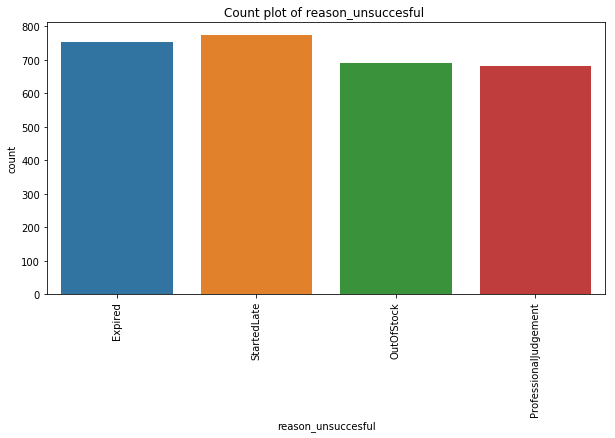

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(immun_df['reason_unsuccesful'][immun_df['reason_unsuccesful'] != 'Success'])
plt.xticks(rotation = 90)
plt.title("Count plot of reason_unsuccesful ")   

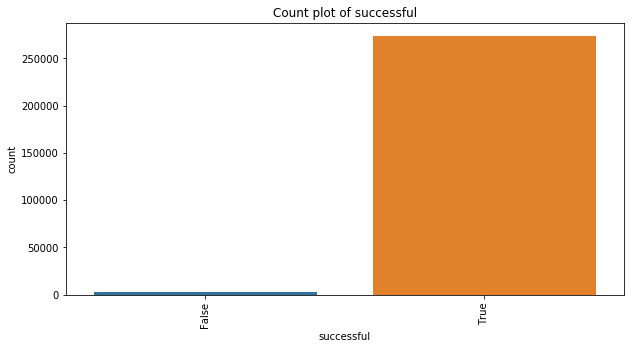

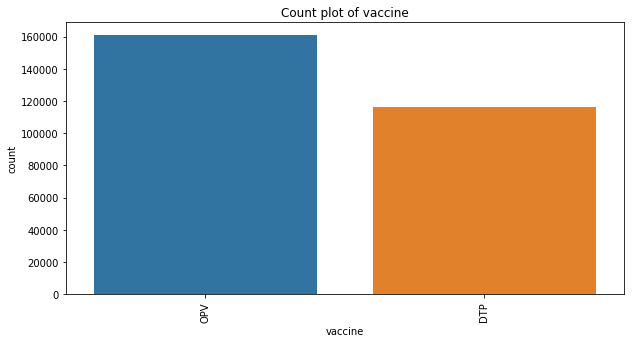

In [27]:
vars_to_look = ['successful', 'vaccine']
for i, var in enumerate(vars_to_look):
    plt.figure(figsize=(10,5))
    sns.countplot(immun_df[var])
    plt.xticks(rotation = 90)
    plt.title("Count plot of " + var)   

In [28]:
# convert the date to a date object
immun_df['im_date']=pd.to_datetime(immun_df['im_date'], format='%Y-%m-%d')
immun_df['im_date'].describe()

count                  276763
unique                    730
top       2018-12-14 00:00:00
freq                      522
first     2018-01-01 00:00:00
last      2019-12-31 00:00:00
Name: im_date, dtype: object

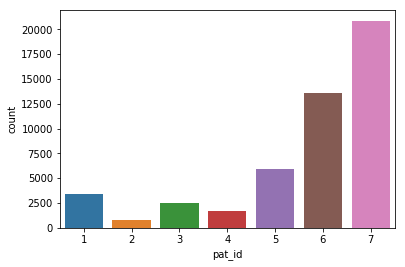

In [29]:
# how many records per pat_id?
sns.countplot(immun_df.pat_id.value_counts())

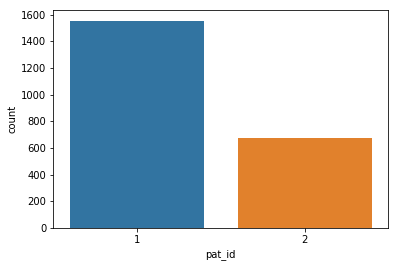

In [30]:
# see how many unsuccesful vaccinations by patient id
sns.countplot(immun_df.loc[immun_df['successful']==False].pat_id.value_counts())

Notes on immun df:
- 6 columns in immun db- only one columns missing values
- imbalanced towards succesful cases
- unsuccessful cases only have 1 or 2 records



#### combined table with patients and immunization info

In [31]:
combin_df = immun_df.merge(patients_df, on= 'pat_id')
combin_df.head(5)

# x is immmun df
# y is patients df

,pat_id,vaccine,im_date,successful,reason_unsuccesful,fac_id,dob,gender,long,lat,region,district
0,1,OPV,2019-01-31,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi
1,1,OPV,2019-04-03,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi
2,1,OPV,2019-05-25,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi
3,1,OPV,2019-07-06,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi
4,1,DTP,2019-04-03,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi


In [32]:
combin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276763 entries, 0 to 276762
Data columns (total 12 columns):
pat_id                276763 non-null int64
vaccine               276763 non-null object
im_date               276763 non-null datetime64[ns]
successful            276763 non-null bool
reason_unsuccesful    276763 non-null object
fac_id                276763 non-null object
dob                   276763 non-null datetime64[ns]
gender                276763 non-null object
long                  276763 non-null object
lat                   276763 non-null object
region                276763 non-null object
district              276763 non-null object
dtypes: bool(1), datetime64[ns](2), int64(1), object(8)
memory usage: 25.6+ MB


In [33]:
# create an extra column - days_aftr_dob
combin_df['days_aftr_dob'] = (combin_df.im_date - combin_df.dob).dt.days

In [34]:
combin_df.head(2)

#sanity check
combin_df['days_aftr_dob'][combin_df['days_aftr_dob'] <0]

Series([], Name: days_aftr_dob, dtype: int64)

In [35]:
#sample a random patient

combin_df.loc[combin_df['pat_id']==10683]

,pat_id,vaccine,im_date,successful,reason_unsuccesful,fac_id,dob,gender,long,lat,region,district,days_aftr_dob
55126,10683,OPV,2018-03-16,True,Success,277,2018-03-16,m,23.3774,-18.1177,NA,NA,0
55127,10683,OPV,2018-06-05,True,Success,277,2018-03-16,m,23.3774,-18.1177,NA,NA,81
55128,10683,OPV,2018-08-02,True,Success,277,2018-03-16,m,23.3774,-18.1177,NA,NA,139
55129,10683,DTP,2018-07-04,True,Success,277,2018-03-16,m,23.3774,-18.1177,NA,NA,110
55130,10683,DTP,2018-07-23,True,Success,277,2018-03-16,m,23.3774,-18.1177,NA,NA,129


Notes on training data:

- need the training data to contain info from first 4 months of life
- target label is binary:
    - intervene (child did NOT complete vaccinations by 6 months)
    - don't-intervene (child completed vaccinations by 6 months)

In [36]:
# y is True if patient child did NOT complete vaccinations by 6 months 
# and therefore would need intervention at 4 months
# otherwise False



# longest amount of days in 6 consecutive months is 184 days
# create df for ALL records where vaccine was given before 6 mo of age
six_mo_data = combin_df.loc[combin_df['days_aftr_dob']<=184]

# filter for success all True
six_mo_success = six_mo_data.loc[six_mo_data['successful']]  
six_mo_success.describe(include= "all")

,pat_id,vaccine,im_date,successful,reason_unsuccesful,fac_id,dob,gender,long,lat,region,district,days_aftr_dob
count,260963.000000,260963,260963,260963,260963,260963,260963,260963,260963,260963,260963,260963,260963.000000
unique,NaN,2,729,1,1,346,729,3,346,346,16,25,NaN
top,NaN,OPV,2018-12-14 00:00:00,True,Success,NA,2019-04-14 00:00:00,m,NA,NA,North-West,Ngamiland East,NaN
freq,NaN,152774,498,260963,260963,12920,568,127986,13081,13081,87871,79018,NaN
first,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-30 00:00:00,NaN,NaN,NaN,2019-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,25006.386656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.592869
std,14448.138424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.254925
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,12482.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


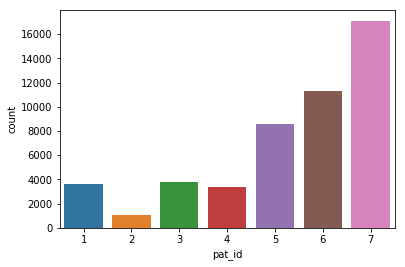

In [37]:
# count the pat id

sns.countplot(six_mo_success.pat_id.value_counts())

In [38]:
rec_counts_df = six_mo_success['pat_id'].value_counts()
rec_counts_df = rec_counts_df.to_frame()
rec_counts_df.info() # df that contains patients ids and count of records avail

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48824 entries, 27587 to 7967
Data columns (total 1 columns):
pat_id    48824 non-null int64
dtypes: int64(1)
memory usage: 762.9 KB


In [39]:
rec_counts_df = rec_counts_df.reset_index()
rec_counts_df = rec_counts_df.rename(columns={"pat_id": "count", "index": "pat_id"})

In [40]:
rec_counts_df.head()

,pat_id,count
0,27587,7
1,20541,7
2,29083,7
3,28374,7
4,30776,7


In [41]:
patients_done_df = rec_counts_df.loc[rec_counts_df['count']==7]
patients_done_df.pat_id.nunique()
#the pat ids which have completed all their immunization successfully within 6 months

17102

In [42]:
patients_done_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17102 entries, 0 to 17101
Data columns (total 2 columns):
pat_id    17102 non-null int64
count     17102 non-null int64
dtypes: int64(2)
memory usage: 400.8 KB


In [43]:
# creating y target for those who don't need intervention
patients_done_df.insert(2, "Y", [False]*17102, True) 
patients_done_df.head()

,pat_id,count,Y
0,27587,7,False
1,20541,7,False
2,29083,7,False
3,28374,7,False
4,30776,7,False


#### combined table with all data and target var Y 

In [44]:
combin_df_y = pd.merge(right = patients_done_df, left = combin_df, how = "left", 
                       left_on = 'pat_id', right_on = 'pat_id')

# x is left
# y is right
combin_df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276763 entries, 0 to 276762
Data columns (total 15 columns):
pat_id                276763 non-null int64
vaccine               276763 non-null object
im_date               276763 non-null datetime64[ns]
successful            276763 non-null bool
reason_unsuccesful    276763 non-null object
fac_id                276763 non-null object
dob                   276763 non-null datetime64[ns]
gender                276763 non-null object
long                  276763 non-null object
lat                   276763 non-null object
region                276763 non-null object
district              276763 non-null object
days_aftr_dob         276763 non-null int64
count                 119714 non-null float64
Y                     119714 non-null object
dtypes: bool(1), datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 31.9+ MB


In [45]:
# looking at random patient
combin_df_y[combin_df_y['pat_id'] == 11]

,pat_id,vaccine,im_date,successful,reason_unsuccesful,fac_id,dob,gender,long,lat,region,district,days_aftr_dob,count,Y
54,11,OPV,2019-03-28,True,Success,118,2019-02-21,m,22.4003,-26.0223,Kgalagadi,Tshabong,35,NaN,NaN
55,11,OPV,2019-06-08,True,Success,118,2019-02-21,m,22.4003,-26.0223,Kgalagadi,Tshabong,107,NaN,NaN
56,11,OPV,2019-07-28,True,Success,118,2019-02-21,m,22.4003,-26.0223,Kgalagadi,Tshabong,157,NaN,NaN
57,11,OPV,2019-09-10,True,Success,118,2019-02-21,m,22.4003,-26.0223,Kgalagadi,Tshabong,201,NaN,NaN
58,11,DTP,2019-06-08,True,Success,118,2019-02-21,m,22.4003,-26.0223,Kgalagadi,Tshabong,107,NaN,NaN
59,11,DTP,2019-07-28,True,Success,118,2019-02-21,m,22.4003,-26.0223,Kgalagadi,Tshabong,157,NaN,NaN
60,11,DTP,2019-09-10,True,Success,118,2019-02-21,m,22.4003,-26.0223,Kgalagadi,Tshabong,201,NaN,NaN


In [46]:
# drop the count column and fill null values in Y with True
combin_df_y = combin_df_y.drop(columns = ['count'])
combin_df_y['Y'] = combin_df_y['Y'].fillna(True)

In [47]:
combin_df_y.describe(include ='all')

,pat_id,vaccine,im_date,successful,reason_unsuccesful,fac_id,dob,gender,long,lat,region,district,days_aftr_dob,Y
count,276763.000000,276763,276763,276763,276763,276763,276763,276763,276763,276763,276763,276763,276763.000000,276763
unique,NaN,2,730,2,5,346,729,3,346,346,16,25,NaN,2
top,NaN,OPV,2018-12-14 00:00:00,True,Success,NA,2019-04-14 00:00:00,m,NA,NA,North-West,Ngamiland East,NaN,True
freq,NaN,160792,522,273864,273864,13700,604,135733,14008,14008,92454,83130,NaN,157049
first,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,2019-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25008.988969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.589598,NaN
std,14443.509072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.139991,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,12493.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,NaN


##### create the training data (only data on first 4 months of life)

In [48]:
# longest amount of days in 4 consecutive months is july - oct == 123 days
training_data = combin_df_y[combin_df_y['days_aftr_dob'] <= 123 ]

In [49]:
training_data.head()

,pat_id,vaccine,im_date,successful,reason_unsuccesful,fac_id,dob,gender,long,lat,region,district,days_aftr_dob,Y
0,1,OPV,2019-01-31,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi,9,False
1,1,OPV,2019-04-03,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi,71,False
2,1,OPV,2019-05-25,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi,123,False
4,1,DTP,2019-04-03,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi,71,False
5,1,DTP,2019-05-25,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi,123,False


In [50]:
training_data.describe(include = 'all')

,pat_id,vaccine,im_date,successful,reason_unsuccesful,fac_id,dob,gender,long,lat,region,district,days_aftr_dob,Y
count,213027.000000,213027,213027,213027,213027,213027,213027,213027,213027,213027,213027,213027,213027.000000,213027
unique,NaN,2,730,2,5,346,729,3,346,346,16,25,NaN,2
top,NaN,OPV,2018-12-14 00:00:00,True,Success,NA,2019-04-14 00:00:00,f,NA,NA,North-West,Ngamiland East,NaN,True
freq,NaN,128543,402,210993,210993,10560,439,104406,10604,10604,71461,64228,NaN,115527
first,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,2019-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25028.248077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.311172,NaN
std,14440.417726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.453081,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,12519.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN


In [51]:
training_data.head(3)

,pat_id,vaccine,im_date,successful,reason_unsuccesful,fac_id,dob,gender,long,lat,region,district,days_aftr_dob,Y
0,1,OPV,2019-01-31,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi,9,False
1,1,OPV,2019-04-03,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi,71,False
2,1,OPV,2019-05-25,True,Success,51,2019-01-22,f,NA,NA,Ghanzi,Ghanzi,123,False


#### Data for baseline model

In [52]:
# I want a quick first model to set a baseline so I will drop some data,
# and create one record per patient

training_data = training_data.drop(columns = ['im_date', 'reason_unsuccesful', 'dob',
                                             'days_aftr_dob', 'long', 'lat'])
training_data.head(3)

,pat_id,vaccine,successful,fac_id,gender,region,district,Y
0,1,OPV,True,51,f,Ghanzi,Ghanzi,False
1,1,OPV,True,51,f,Ghanzi,Ghanzi,False
2,1,OPV,True,51,f,Ghanzi,Ghanzi,False


In [53]:
dtp = training_data.groupby(['pat_id','vaccine']).size().reset_index().rename(columns={0: "n-dtp"})
dtp = dtp[dtp.vaccine == 'DTP']
dtp = dtp.drop(columns = ['vaccine'])

opv = training_data.groupby(['pat_id','vaccine']).size().reset_index().rename(columns={0: "n-opv"})
opv = opv[opv.vaccine == 'OPV']
opv = opv.drop(columns = ['vaccine'])

In [54]:
training_data = training_data.drop(columns = ['vaccine', 'successful'])

In [55]:
training_data = training_data.drop_duplicates() #we just need one record per patient now

In [56]:
training_data = pd.merge(right = opv, left = training_data, how = "left", left_on = 'pat_id', right_on = 'pat_id')
training_data = pd.merge(right = dtp, left = training_data, how = "left", left_on = 'pat_id', right_on = 'pat_id')

In [57]:
training_data.head()

,pat_id,fac_id,gender,region,district,Y,n-opv,n-dtp
0,1,51,f,Ghanzi,Ghanzi,False,3.0,2.0
1,2,89,f,Chobe,Chobe,True,1.0,NaN
2,3,161,m,Central,Tutume,True,2.0,1.0
3,4,168,f,Central,Lethlakane,True,1.0,1.0
4,5,183,m,Central,Tuli,True,3.0,2.0


In [58]:
training_data['n-opv'] = training_data['n-opv'].fillna(0)
training_data['n-dtp'] = training_data['n-dtp'].fillna(0)

training_data.head(10)

,pat_id,fac_id,gender,region,district,Y,n-opv,n-dtp
0,1,51,f,Ghanzi,Ghanzi,False,3.0,2.0
1,2,89,f,Chobe,Chobe,True,1.0,0.0
2,3,161,m,Central,Tutume,True,2.0,1.0
3,4,168,f,Central,Lethlakane,True,1.0,1.0
4,5,183,m,Central,Tuli,True,3.0,2.0
5,6,142,f,Central,Tutume,False,4.0,3.0
6,7,287,f,North-West,Ngamiland East,False,4.0,3.0
7,8,88,f,NA,NA,True,1.0,2.0
8,9,280,m,Kweneng,Kweneng South,False,3.0,2.0
9,10,289,f,North-West,Ngamiland East,True,3.0,3.0


In [59]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48775 entries, 0 to 48774
Data columns (total 8 columns):
pat_id      48775 non-null int64
fac_id      48775 non-null object
gender      48775 non-null object
region      48775 non-null object
district    48775 non-null object
Y           48775 non-null bool
n-opv       48775 non-null float64
n-dtp       48775 non-null float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 3.0+ MB


In [ ]:
training_data.describe(include = 'all')

In [66]:
training_data.to_csv("proc_data/training_baseline.csv", index= False)

summary of data processing:
    
    
- featuring engineering + feature extraction 
- Imputed missing data
- Class imbalance in the data which we will handle with evaluation metric and loss function
